In [1]:
#!pip install promb

In [2]:
from promb import init_db, print_nearest

# Re-import when running cell
# %load_ext autoreload
# %autoreload 2

In [3]:
# here we use human SwissProt reference (20k sequences)
# note you can also use human-reference, human-oas, or a custom database (fasta with sequences or txt with one peptide per line)
db = init_db('human-swissprot', 9)


              *           █
▄▄▄▄    ▄▄▄  ▄█▄   ▄▄▄▄   █▄▄▄  
█   █  █    █▓███  █ █ █  █   █ 
█▄▄▄▀  █    ▀███▀  █   █  █▄▄▄▀ 
█                              
▀  protein mutation burden v1.0.1
                                
Loading promb database to memory...
Database (~10M peptides, <512 MB) loaded in 3s.


In [4]:
seq = "MGPLHQFLLLLITALSQALNTTVLQGMAGQSLRVSCTYDALKHWGRRKAWCRQLGEEGPC"

## Scores

In [5]:
# example sequence chunk from TREM2_MOUSE
peptide_content = db.compute_peptide_content(seq)
peptide_content

0.1346153846153846

In [6]:
# Average mutations per peptide
mut = db.compute_average_mutations(seq)
mut

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.26it/s]


1.6153846153846154

## Nearest peptides

In [7]:
peptides = db.chop_seq_peptides(seq)
print(peptides)

['MGPLHQFLL', 'GPLHQFLLL', 'PLHQFLLLL', 'LHQFLLLLI', 'HQFLLLLIT', 'QFLLLLITA', 'FLLLLITAL', 'LLLLITALS', 'LLLITALSQ', 'LLITALSQA', 'LITALSQAL', 'ITALSQALN', 'TALSQALNT', 'ALSQALNTT', 'LSQALNTTV', 'SQALNTTVL', 'QALNTTVLQ', 'ALNTTVLQG', 'LNTTVLQGM', 'NTTVLQGMA', 'TTVLQGMAG', 'TVLQGMAGQ', 'VLQGMAGQS', 'LQGMAGQSL', 'QGMAGQSLR', 'GMAGQSLRV', 'MAGQSLRVS', 'AGQSLRVSC', 'GQSLRVSCT', 'QSLRVSCTY', 'SLRVSCTYD', 'LRVSCTYDA', 'RVSCTYDAL', 'VSCTYDALK', 'SCTYDALKH', 'CTYDALKHW', 'TYDALKHWG', 'YDALKHWGR', 'DALKHWGRR', 'ALKHWGRRK', 'LKHWGRRKA', 'KHWGRRKAW', 'HWGRRKAWC', 'WGRRKAWCR', 'GRRKAWCRQ', 'RRKAWCRQL', 'RKAWCRQLG', 'KAWCRQLGE', 'AWCRQLGEE', 'WCRQLGEEG', 'CRQLGEEGP', 'RQLGEEGPC']


In [8]:
nearest1 = db.find_nearest_peptides(peptides, n=1)
print(nearest1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:03<00:00, 14.24it/s]

[['MAPLHPFLL'], ['LPLHQQLLL'], ['PLHVFVLLL'], ['LHKVLLLLI'], ['HQFLLEPIT'], ['IFLLLLITV'], ['FLLLLITVL'], ['LLLLIQALS'], ['LLLVLALSQ'], ['LLLTCLSQA'], ['QITALSQAL'], ['VTALSQALN'], ['TALSQALNR'], ['ALLQSLNTT'], ['LSPYLNTTV'], ['SKALNTPVL'], ['QAFNTTVKQ'], ['AMNTTVMQG'], ['MNTTVMQGF'], ['NTTVFQGVA'], ['TTVFQGVAG'], ['TVFQGVAGQ'], ['VFQGVAGQS'], ['FQGVAGQSL'], ['QGVAGQSLQ'], ['GLAGQSLRL'], ['VAGQSLQVS'], ['AGQSLQVSC'], ['GRSLRLSCT'], ['ASLKVSCTY'], ['SLKVSCTYK'], ['LQVSCPYDS'], ['IVSCEYDAL'], ['VSCEYDALR'], ['SCPYDSMKH'], ['CPYDSMKHW'], ['PYDSMKHWG'], ['YDSMKHWGR'], ['DSMKHWGRR'], ['SMKHWGRRK'], ['MKHWGRRKA'], ['KHWGRRKAW'], ['HWGRRKAWC'], ['WGRRKAWCR'], ['GRRKAWCRQ'], ['RRKAWCRQL'], ['RKAWCRQLG'], ['KAWCRQLGE'], ['AWCRQLGEK'], ['WCRQLGEKG'], ['CRQLGEKGP'], ['RQLGEKGPC']]


In [9]:
print_nearest(peptides, nearest1)

^ = mutation, + = similar residue

1          2          3          4          5          6          7          8          9          10       
MGPLHQFLL  GPLHQFLLL  PLHQFLLLL  LHQFLLLLI  HQFLLLLIT  QFLLLLITA  FLLLLITAL  LLLLITALS  LLLITALSQ  LLITALSQA queries
MAPLHPFLL  LPLHQQLLL  PLHVFVLLL  LHKVLLLLI  HQFLLEPIT  IFLLLLITV  FLLLLITVL  LLLLIQALS  LLLVLALSQ  LLLTCLSQA hits
 ^   ^     ^    ^        ^ +       +^            ^^    ^       ^         ^        ^        +^        + ^    

11         12         13         14         15         16         17         18         19         20       
LITALSQAL  ITALSQALN  TALSQALNT  ALSQALNTT  LSQALNTTV  SQALNTTVL  QALNTTVLQ  ALNTTVLQG  LNTTVLQGM  NTTVLQGMA queries
QITALSQAL  VTALSQALN  TALSQALNR  ALLQSLNTT  LSPYLNTTV  SKALNTPVL  QAFNTTVKQ  AMNTTVMQG  MNTTVMQGF  NTTVFQGVA hits
^          +                  ^    ^ +        ^^        +    ^      ^    ^    +    +    +    +  ^      ^  + 

21         22         23         24         25         26        

In [10]:
nearest2 = db.find_nearest_peptides(peptides, n=2)
print(nearest2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:04<00:00, 11.17it/s]

[['MAPLHPFLL', 'GGPLHKFLV'], ['LPLHQQLLL', 'LPLLQFLLL'], ['PLHVFVLLL', 'PLHQALVLL'], ['LHKVLLLLI', 'LHQFLLEPI'], ['HQFLLEPIT', 'SIFLLLLIT'], ['IFLLLLITV', 'QFLPALITA'], ['FLLLLITVL', 'FLLLAITAL'], ['LLLLIQALS', 'LLLLLTALP'], ['LLLVLALSQ', 'LLLLTALSP'], ['LLLTCLSQA', 'IQITALSQA'], ['QITALSQAL', 'AVTALSQAL'], ['VTALSQALN', 'ITALSQALS'], ['TALSQALNR', 'TALSQALSI'], ['ALLQSLNTT', 'ALSQALNRH'], ['LSPYLNTTV', 'LSGAHNTTV'], ['SKALNTPVL', 'SPYLNTTVL'], ['QAFNTTVKQ', 'EAMNTTVMQ'], ['AMNTTVMQG', 'AKNSTVLQG'], ['MNTTVMQGF', 'KNSTVLQGV'], ['NTTVFQGVA', 'NSTVLQGVT'], ['TTVFQGVAG', 'TVVLQGPAG'], ['TVFQGVAGQ', 'TELQGLIGQ'], ['VFQGVAGQS', 'VLQSVAGQT'], ['FQGVAGQSL', 'VSGMAGQSL'], ['QGVAGQSLQ', 'LGLAGQSLR'], ['GLAGQSLRL', 'GMPGQSMRV'], ['VAGQSLQVS', 'LAGQSLRLE'], ['AGQSLQVSC', 'AGQTIRVGC'], ['GRSLRLSCT', 'GQSLQVSCP'], ['ASLKVSCTY', 'QSLQVSCPY'], ['SLKVSCTYK', 'SLQVSCPYD'], ['LQVSCPYDS', 'LQVSCSYDH'], ['IVSCEYDAL', 'QVSCSYDHL'], ['VSCEYDALR', 'VSCPYDSMK'], ['SCPYDSMKH', 'SCSYDATTH'], ['CPYDSMKHW', 'CSYD

In [11]:
print_nearest(peptides, nearest2)

^ = mutation, + = similar residue

1          2          3          4          5          6          7          8          9          10       
MGPLHQFLL  GPLHQFLLL  PLHQFLLLL  LHQFLLLLI  HQFLLLLIT  QFLLLLITA  FLLLLITAL  LLLLITALS  LLLITALSQ  LLITALSQA queries
MAPLHPFLL  LPLHQQLLL  PLHVFVLLL  LHKVLLLLI  HQFLLEPIT  IFLLLLITV  FLLLLITVL  LLLLIQALS  LLLVLALSQ  LLLTCLSQA #1 hit
 ^   ^     ^    ^        ^ +       +^            ^^    ^       ^         ^        ^        +^        + ^    
GGPLHKFLV  LPLLQFLLL  PLHQALVLL  LHQFLLEPI  SIFLLLLIT  QFLPALITA  FLLLAITAL  LLLLLTALP  LLLLTALSP  IQITALSQA #2 hit
^    +  +  ^  ^           ^ +          ^^   ^^            ^^          ^          +   ^     +    ^  +^       

11         12         13         14         15         16         17         18         19         20       
LITALSQAL  ITALSQALN  TALSQALNT  ALSQALNTT  LSQALNTTV  SQALNTTVL  QALNTTVLQ  ALNTTVLQG  LNTTVLQGM  NTTVLQGMA queries
QITALSQAL  VTALSQALN  TALSQALNR  ALLQSLNTT  LSPYLNTTV  SKALNTP

In [12]:
db.find_nearest_peptides(['GGGGGGGGG'], n=3)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.70it/s]


[['GGGGGGGGG', 'AGGGGGGGG', 'GAGGGGGGG']]

In [13]:
db.find_peptide_sources('GGQGGGGGG')

{'sp|Q5UCC4|EMC10_HUMAN ER membrane protein complex subunit 10 OS=Homo sapiens OX=9606 GN=EMC10 PE=1 SV=1': 'MAAASAGATRLLLLLLMAVAAPSRARGSGCRAGTGARGAGAEGREGEACGTVGLLLEHSFEIDDSANFRKRGSLLWNQQDGTLSLSQRQLSEEERGRLRDVAALNGLYRVRIPRRPGALDGLEAGGYVSSFVPACSLVESHLSDQLTLHVDVAGNVVGVSVVTHPGGCRGHEVEDVDLELFNTSVQLQPPTTAPGPETAAFIERLEMEQAQKAKNPQEQKSFFAKYWMYIIPVVLFLMMSGAPDTGGQGGGGGGGGGGGSGR',
 'sp|P54727|RD23B_HUMAN UV excision repair protein RAD23 homolog B OS=Homo sapiens OX=9606 GN=RAD23B PE=1 SV=1': 'MQVTLKTLQQQTFKIDIDPEETVKALKEKIESEKGKDAFPVAGQKLIYAGKILNDDTALKEYKIDEKNFVVVMVTKPKAVSTPAPATTQQSAPASTTAVTSSTTTTVAQAPTPVPALAPTSTPASITPASATASSEPAPASAAKQEKPAEKPAETPVATSPTATDSTSGDSSRSNLFEDATSALVTGQSYENMVTEIMSMGYEREQVIAALRASFNNPDRAVEYLLMGIPGDRESQAVVDPPQAASTGAPQSSAVAAAAATTTATTTTTSSGGHPLEFLRNQPQFQQMRQIIQQNPSLLPALLQQIGRENPQLLQQISQHQEHFIQMLNEPVQEAGGQGGGGGGGSGGIAEAGSGHMNYIQVTPQEKEAIERLKALGFPEGLVIQAYFACEKNENLAANFLLQQNFDED'}

## Suggesting mutations

In [14]:
!pip install seaborn logomaker

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [16]:
nearest3 = db.find_nearest_peptides(peptides, n=3)
pssm = db.compute_pssm(
    seq,
    nearest_peptides=nearest3 # note you can also pass just nearest_peptides=3
)
pssm.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:04<00:00, 10.70it/s]


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
position,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0
2,0.166667,0.0,0.166667,0.0,0.000000,0.333333,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.083333,0.000000,0.0,0.0,0.0,0.916667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.8,0.0,0.0,0.066667,0.000000,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.000000,0.0


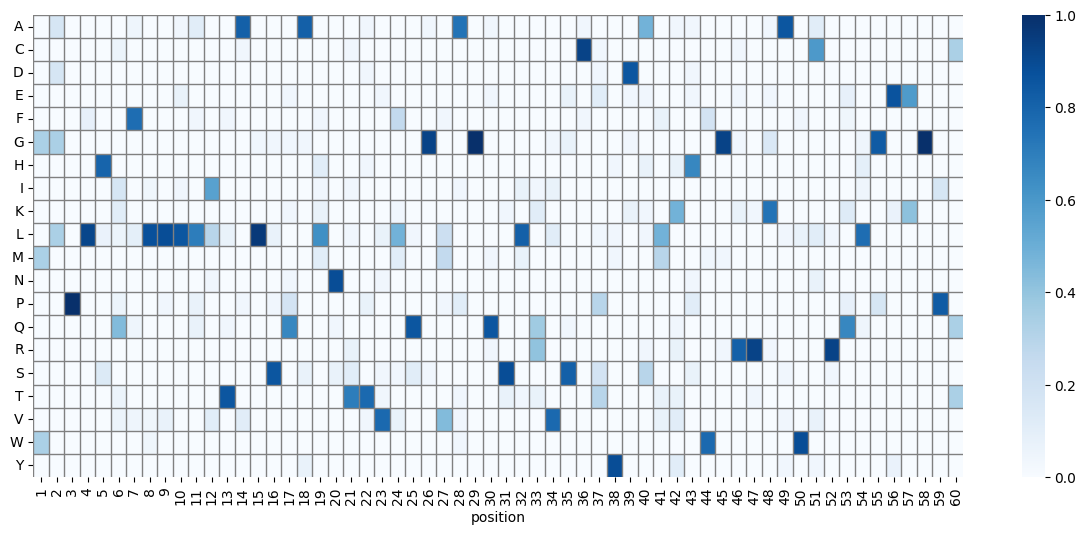

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(pssm.T, cmap='Blues')

ax.set_yticklabels(ax.get_yticklabels(), rotation=0);
for x in range(len(seq)):
    ax.axvline(x, color='grey', lw=1)
for y in range(20):
    ax.axhline(y, color='grey', lw=1);

In [19]:
likelihood = db.compute_positional_likelihood(seq, nearest_peptides=nearest1)
print(likelihood)

[1.0, 0.0, 1.0, 1.0, 1.0, 0.33333333333333337, 0.7142857142857143, 0.875, 1.0, 0.8888888888888888, 0.7777777777777778, 0.6666666666666667, 0.7777777777777778, 0.6666666666666667, 1.0, 0.8888888888888888, 0.7777777777777778, 0.7777777777777778, 0.6666666666666667, 1.0, 0.8888888888888888, 0.8888888888888888, 1.0, 0.11111111111111105, 1.0, 1.0, 0.0, 1.0, 1.0, 0.7777777777777778, 1.0, 1.0, 0.22222222222222232, 0.7777777777777778, 1.0, 1.0, 0.33333333333333337, 1.0, 0.8888888888888888, 0.2222222222222222, 0.2222222222222222, 0.8888888888888888, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0]


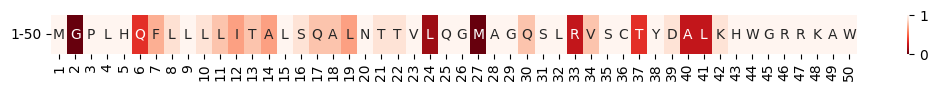

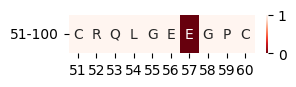

In [20]:
wrap = 50
for start in range(0, len(likelihood), wrap):
    chunk = likelihood[start:start+wrap]
    fig, ax = plt.subplots(figsize=(0.5 + 0.25 * len(chunk), 0.5))
    sns.heatmap(
        [likelihood[start:start+wrap]],
        annot=[list(seq[start:start+wrap])],
        fmt='s',
        cmap='Reds_r',
        vmin=0,
        vmax=1,
    );
    ax.set_yticks([0.5])
    ax.set_yticklabels([f"{start+1}-{start+wrap}"], rotation=0)
    ax.set_xticks(np.arange(len(chunk)) + 0.5)
    ax.set_xticklabels(range(start+1, start + len(chunk) + 1))

In [21]:
import logomaker

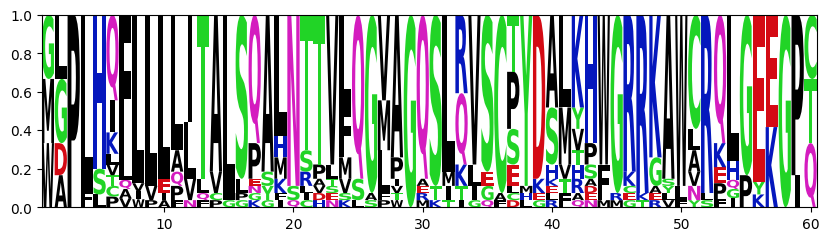

In [22]:
logomaker.Logo(pssm);

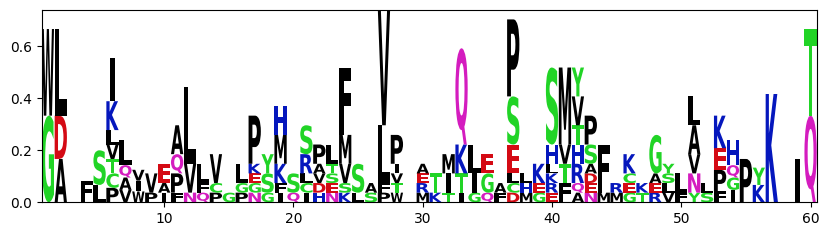

In [23]:
pssm_mutations = db.compute_pssm(seq, nearest_peptides=nearest3, ignore_wildtype=True)
logomaker.Logo(pssm_mutations);

## Humanizing mutations (naive approach)

In [24]:
subseq = "DALKHWGRRKAWC"
subseq_nearest = db.find_nearest_peptides(
    db.chop_seq_peptides(subseq), 
    n=2 # Explore different numbers of nearest peptides to get more suggestions in the PSSM
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.40it/s]


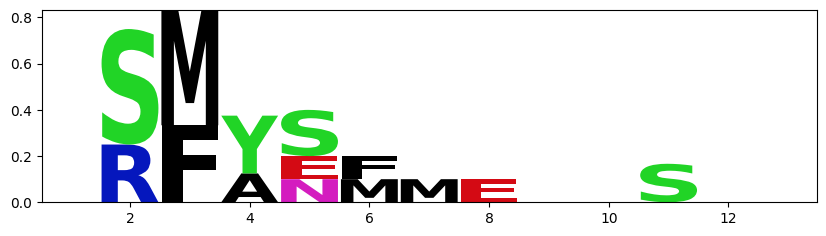

In [25]:
subseq_pssm_mutations = db.compute_pssm(subseq, nearest_peptides=subseq_nearest, ignore_wildtype=True)
logomaker.Logo(subseq_pssm_mutations);

In [26]:
for candidate in db.suggest_point_mutant_candidates(subseq, nearest_peptides=subseq_nearest)[:5]:
    mutations = " ".join(f"{aa}{pos}{bb}" for pos, (aa, bb) in enumerate(zip(subseq, candidate), start=1) if aa != bb)
    avg = db.compute_average_mutations(candidate)
    print(f">{mutations} AvgMut={avg:.2f}\n{candidate}")

>L3M AvgMut=0.40
DAMKHWGRRKAWC
>A2S AvgMut=0.60
DSLKHWGRRKAWC
>L3F AvgMut=1.00
DAFKHWGRRKAWC


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.26it/s]

>K4Y AvgMut=1.60
DALYHWGRRKAWC
>A2R AvgMut=1.00
DRLKHWGRRKAWC


In [27]:
for candidate in db.suggest_double_mutant_candidates(subseq, nearest_peptides=subseq_nearest)[:5]:
    mutations = " ".join(f"{aa}{pos}{bb}" for pos, (aa, bb) in enumerate(zip(subseq, candidate), start=1) if aa != bb)
    avg = db.compute_average_mutations(candidate)
    print(f">{mutations} AvgMut={avg:.2f}\n{candidate}")

>A2S L3M AvgMut=0.00
DSMKHWGRRKAWC
>A2S L3F AvgMut=0.60
DSFKHWGRRKAWC
>A2R L3M AvgMut=0.40
DRMKHWGRRKAWC
>L3M K4Y AvgMut=1.20
DAMYHWGRRKAWC
>A2S K4Y AvgMut=1.40
DSLYHWGRRKAWC


In [28]:
for candidate in db.suggest_triple_mutant_candidates(subseq, nearest_peptides=subseq_nearest)[:5]:
    mutations = " ".join(f"{aa}{pos}{bb}" for pos, (aa, bb) in enumerate(zip(subseq, candidate), start=1) if aa != bb)
    avg = db.compute_average_mutations(candidate)
    print(f">{mutations} AvgMut={avg:.2f}\n{candidate}")

>A2S L3M H5S AvgMut=1.00
DSMKSWGRRKAWC
>A2S L3M A11S AvgMut=0.60
DSMKHWGRRKSWC
>A2S L3M K4Y AvgMut=0.80
DSMYHWGRRKAWC
>A2S L3F H5S AvgMut=1.40
DSFKSWGRRKAWC
>A2S L3F A11S AvgMut=1.20
DSFKHWGRRKSWC
